In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("breast-cancer.csv")

In [4]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Convert target 'M'/'B' to binary 1/0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [8]:
# Use all features except 'id' and 'diagnosis'
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Class distribution: {y.value_counts().to_dict()}")

Dataset loaded: 569 samples, 30 features
Class distribution: {0: 357, 1: 212}


## Train & evaluate Linear and RBF SVM

In [12]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

In [13]:
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [14]:
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [15]:
print("=== Model Accuracy ===")
print(f"Linear SVM: {accuracy_score(y_test, y_pred_linear):.4f}")
print(f"RBF SVM: {accuracy_score(y_test, y_pred_rbf):.4f}")

=== Model Accuracy ===
Linear SVM: 0.9649
RBF SVM: 0.9737


## Cross-validation

In [16]:
cv_linear = cross_val_score(svm_linear, X_train_scaled, y_train, cv=5)
cv_rbf = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=5)

print("=== Cross-Validation (5-fold) ===")
print(f"Linear SVM Mean: {cv_linear.mean():.4f}")
print(f"RBF SVM Mean: {cv_rbf.mean():.4f}")

=== Cross-Validation (5-fold) ===
Linear SVM Mean: 0.9626
RBF SVM Mean: 0.9758


## Hyperparameter tuning for RBF

In [17]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

grid_rbf = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, n_jobs=-1)
grid_rbf.fit(X_train_scaled, y_train)

best_pred = grid_rbf.best_estimator_.predict(X_test_scaled)

print("=== Hyperparameter Tuning (RBF) ===")
print(f"Best Params: {grid_rbf.best_params_}")
print(f"Best CV Score: {grid_rbf.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, best_pred):.4f}")

=== Hyperparameter Tuning (RBF) ===
Best Params: {'C': 1, 'gamma': 'scale'}
Best CV Score: 0.9758
Test Accuracy: 0.9737


## 2D Decision Boundary Visualization

In [18]:
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='black', linewidths=1.5)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

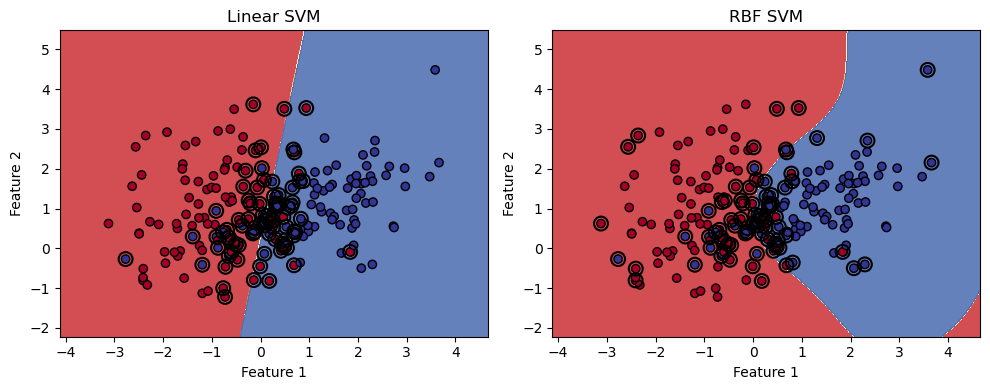

In [19]:
X_2d, y_2d = make_classification(n_samples=200, n_features=2,
                                 n_informative=2, n_redundant=0,
                                 n_clusters_per_class=1, random_state=42)

svm_lin_2d = SVC(kernel='linear').fit(X_2d, y_2d)
svm_rbf_2d = SVC(kernel='rbf').fit(X_2d, y_2d)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_2d, y_2d, svm_lin_2d, "Linear SVM")
plt.subplot(1, 2, 2)
plot_decision_boundary(X_2d, y_2d, svm_rbf_2d, "RBF SVM")
plt.tight_layout()
plt.show()